* [Titanic 100%](https://www.kaggle.com/blurredmachine/titanic-survival-a-complete-guide-for-beginners)
* [MLCource](https://mlcourse.ai/)

In [1]:
import os
import warnings
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

warnings.filterwarnings("ignore")


df = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')

In [2]:
# describe(include = ['O'])* will show the descriptive statistics of object data types.
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Giglio, Mr. Victor",male,1601,G6,S
freq,1,577,7,4,644


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

print('Survived: %i (%.1f%%)'%(len(survived), float(len(survived))/len(df)*100))
print('Not Survived: %i (%.1f%%)'%(len(not_survived), float(len(not_survived))/len(df)*100))

print('Total: %i'%len(df))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [5]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
# Вектор показывает группировку внутри колоники по стороннему параметру
pclass_survived = df.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

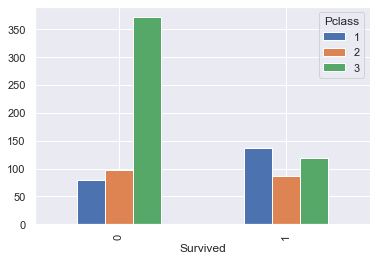

In [7]:
# Метод анстак позволяет разделить данные на группы по значению стороннего параметра
pclass_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [8]:
# Фрейм группирует два параметра: показывает каково среднее вторых параметров для первых
pclass_survived_average = df[['Pclass', 'Survived']].groupby(['Pclass'],
                                                             as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

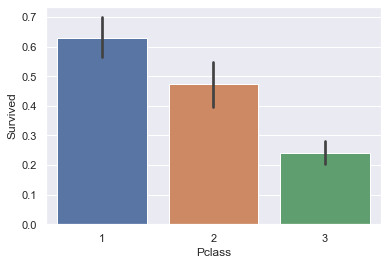

In [9]:
# График группировки по двум параметрам
sns.barplot(x='Pclass', y='Survived', data=df)

In [10]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
sex_survival = df.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

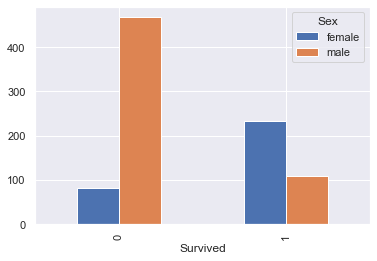

In [12]:
sex_survival.unstack(level=0).plot(kind='bar', subplots=False)